In [10]:
import h5py

# Open the .mat file in read-only mode
filename = 'Part_1.mat'
with h5py.File(filename, 'r') as f:
    print("Top-level keys:", list(f.keys()))
    # If you see e.g. 'Part_1', dive into that group
    grp = f[list(f.keys())[0]]
    print("Inner group keys:", list(grp.keys()))


Top-level keys: ['#refs#', 'Part_1']
Inner group keys: ['0', '0A', '0B', '0C', '0D', '0E', '0F', '0G', '0H', '0I', '0J', '0K', '0L', '0M', '0N', '0O', '0P', '0Q', '0R', '0S', '0T', '0U', '0V', '0b', '0c', '0d', '0e', '0f', '0g', '0h', '0i', '0j', '0k', '0l', '0m', '0n', '0o', '0p', '0q', '0r', '0s', '0t', '0u', '0v', '0w', '0x', '0y', '0z', '1', '1A', '1B', '1C', '1D', '1E', '1F', '1G', '1H', '1I', '1J', '1K', '1L', '1M', '1N', '1O', '1P', '1Q', '1R', '1S', '1T', '1U', '1V', '1b', '1c', '1d', '1e', '1f', '1g', '1h', '1i', '1j', '1k', '1l', '1m', '1n', '1o', '1p', '1q', '1r', '1s', '1t', '1u', '1v', '1w', '1x', '1y', '1z', '2', '2A', '2B', '2C', '2D', '2E', '2F', '2G', '2H', '2I', '2J', '2K', '2L', '2M', '2N', '2O', '2P', '2Q', '2R', '2S', '2T', '2U', '2V', '2b', '2c', '2d', '2e', '2f', '2g', '2h', '2i', '2j', '2k', '2l', '2m', '2n', '2o', '2p', '2q', '2r', '2s', '2t', '2u', '2v', '2w', '2x', '2y', '2z', '3', '3A', '3B', '3C', '3D', '3E', '3F', '3G', '3H', '3I', '3J', '3K', '3L', '3M', 

In [11]:
import h5py
import numpy as np

# Load the HDF5-based .mat file
filename = 'Part_1.mat'
with h5py.File(filename, 'r') as f:
    cell_array = f['Part_1']         # Main 1x3000 cell array
    ref = cell_array[0][0]           # Get first sample's reference
    sample_data = f[ref][:]          # Load actual array (shape unknown)
    sample_shape = sample_data.shape
    print(f"Sample 0 shape: {sample_shape}")
    
    # Print first few values
    flat = np.array(sample_data)
    print("First 10 values:", flat[:10])


Sample 0 shape: (61000, 3)
First 10 values: [[ 1.75953079e+00  6.70629552e+01 -6.06060606e-02]
 [ 1.71847507e+00  6.93586281e+01 -7.52688172e-02]
 [ 1.68426197e+00  7.53664529e+01 -7.03812317e-02]
 [ 1.65786901e+00  8.50375855e+01 -3.51906158e-02]
 [ 1.63734115e+00  9.62228854e+01  2.44379277e-02]
 [ 1.61583578e+00  1.05942862e+02  8.99315738e-02]
 [ 1.59335288e+00  1.12927569e+02  1.54936461e-01]
 [ 1.57086999e+00  1.17665447e+02  2.04789834e-01]
 [ 1.54936461e+00  1.20986846e+02  2.49755621e-01]
 [ 1.52688172e+00  1.23184831e+02  2.74682307e-01]]


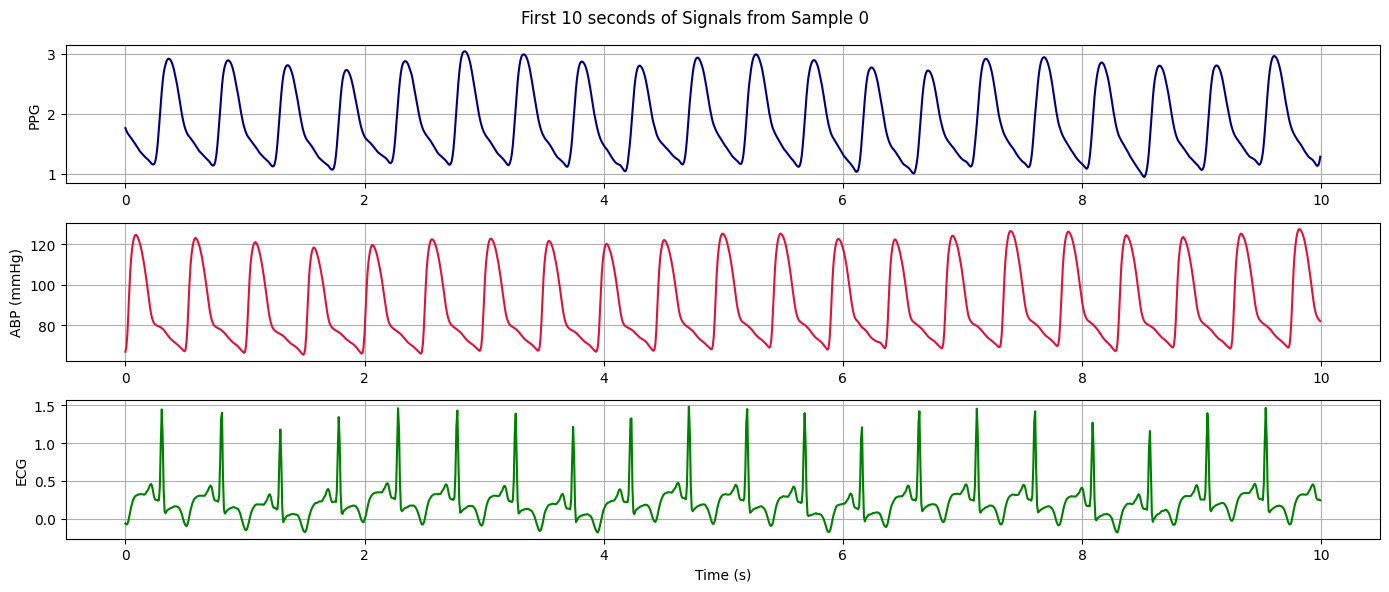

In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = 'Part_1.mat'
with h5py.File(filename, 'r') as f:
    cell_array = f['Part_1']
    ref = cell_array[0][0]
    sample_data = f[ref][:]  # shape: (61000, 3)

# Convert to numpy
signals = np.array(sample_data)
ppg = signals[:, 0]
abp = signals[:, 1]
ecg = signals[:, 2]

# Take first 10 seconds (1250 samples at 125 Hz)
fs = 125
t = np.arange(1250) / fs

plt.figure(figsize=(14, 6))
plt.subplot(3, 1, 1)
plt.plot(t, ppg[:1250], label='PPG', color='navy')
plt.ylabel('PPG')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, abp[:1250], label='ABP', color='crimson')
plt.ylabel('ABP (mmHg)')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, ecg[:1250], label='ECG', color='green')
plt.xlabel('Time (s)')
plt.ylabel('ECG')
plt.grid()

plt.suptitle('First 10 seconds of Signals from Sample 0')
plt.tight_layout()
plt.show()


In [13]:
import h5py
import numpy as np

filename = 'Part_1.mat'
with h5py.File(filename, 'r') as f:
    cell_array = f['Part_1']
    ref = cell_array[0][0]         # sample 0
    sample_data = f[ref][:]        # shape: (61000, 3)

signals = np.array(sample_data)
ppg_full = signals[:, 0]
abp_full = signals[:, 1]

segment_length = 3000
num_segments = len(ppg_full) // segment_length  # Floor division (20 segments)

# Create segmented arrays
ppg_segments = []
abp_segments = []

for i in range(num_segments):
    start = i * segment_length
    end = start + segment_length
    ppg_seg = ppg_full[start:end]
    abp_seg = abp_full[start:end]
    
    ppg_segments.append(ppg_seg)
    abp_segments.append(abp_seg)

print(f"Total segments extracted: {len(ppg_segments)}")


Total segments extracted: 20


In [18]:
from scipy.signal import savgol_filter
import numpy as np

def sg_filter(ppg_signal, fs=125):
    """
    Apply Savitzky-Golay filtering to remove baseline drift from PPG
    """
    window_length = int(0.5 * fs) | 1  # ~0.5 second window, force odd
    polyorder = 2                     # small polynomial preserves peaks
    
    baseline = savgol_filter(ppg_signal, window_length, polyorder)
    filtered_ppg = ppg_signal - baseline
    return filtered_ppg


In [19]:
for i, raw_ppg in enumerate(ppg_segments):
    sg_ppg = sg_filter(raw_ppg)
    snr = compute_snr(sg_ppg)  # same function from earlier
    print(f"Segment {i} (after SG): SNR = {snr:.2f}")


Segment 0 (after SG): SNR = 0.06
Segment 1 (after SG): SNR = 0.06
Segment 2 (after SG): SNR = 0.03
Segment 3 (after SG): SNR = 0.04
Segment 4 (after SG): SNR = 0.07
Segment 5 (after SG): SNR = 0.09
Segment 6 (after SG): SNR = 0.11
Segment 7 (after SG): SNR = 0.07
Segment 8 (after SG): SNR = 0.27
Segment 9 (after SG): SNR = 0.10
Segment 10 (after SG): SNR = 0.04
Segment 11 (after SG): SNR = 0.03
Segment 12 (after SG): SNR = 0.04
Segment 13 (after SG): SNR = 0.04
Segment 14 (after SG): SNR = 0.03
Segment 15 (after SG): SNR = 0.04
Segment 16 (after SG): SNR = 0.06
Segment 17 (after SG): SNR = 0.05
Segment 18 (after SG): SNR = 0.04
Segment 19 (after SG): SNR = 0.03


C:\Users\mohit\AppData\Local\Temp\ipykernel_16216\2486413156.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  signal_power = np.trapz(Pxx[signal_band], f[signal_band])
C:\Users\mohit\AppData\Local\Temp\ipykernel_16216\2486413156.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  noise_power = np.trapz(Pxx[noise_band], f[noise_band])


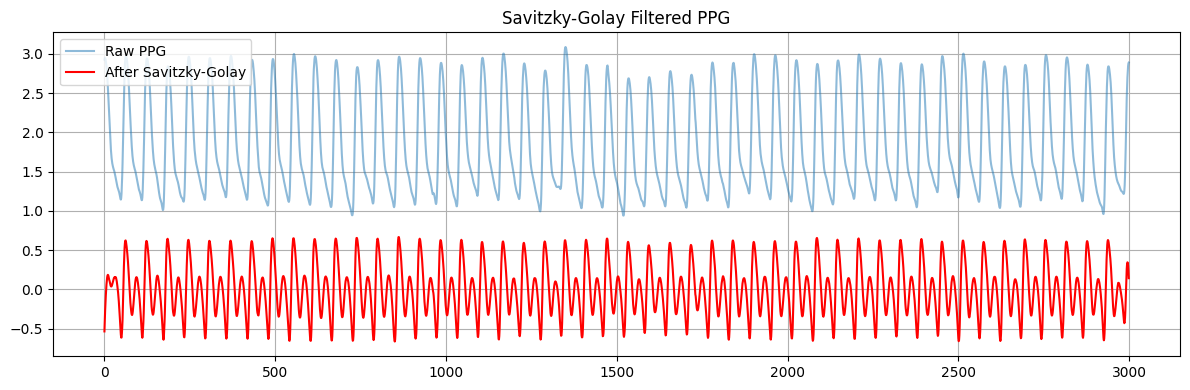

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(raw_ppg, label="Raw PPG", alpha=0.5)
plt.plot(sg_ppg, label="After Savitzky-Golay", color='red')
plt.legend()
plt.title("Savitzky-Golay Filtered PPG")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np

def spa_filter(ppg_signal, fs=125):
    N = len(ppg_signal)
    lam = 4 * fs  # lambda as per the paper (500 for fs=125)

    # Construct second-order difference matrix D
    D = np.zeros((N - 2, N))
    for i in range(N - 2):
        D[i, i] = 1
        D[i, i + 1] = -2
        D[i, i + 2] = 1

    I = np.identity(N)
    baseline_matrix = np.linalg.inv(I + lam * D.T @ D)
    baseline = baseline_matrix @ ppg_signal
    filtered = ppg_signal - baseline
    return filtered


In [6]:
ppg_segment = ppg_segments[0]  # Or any i-th segment
ppg_detrended = spa_filter(ppg_segment)

In [15]:
from scipy.signal import welch

def compute_snr(ppg_segment, fs=125):
    f, Pxx = welch(ppg_segment, fs=fs, nperseg=1024)
    signal_band = (f >= 0.8) & (f <= 4.0)
    noise_band = ~signal_band

    signal_power = np.trapz(Pxx[signal_band], f[signal_band])
    noise_power = np.trapz(Pxx[noise_band], f[noise_band])

    snr = signal_power / (noise_power + 1e-8)
    return snr

In [16]:
# Assuming `ppg_segments` from earlier code is available
for i, raw_ppg in enumerate(ppg_segments):
    spa_ppg = spa_filter(raw_ppg)              # Apply SPA
    snr = compute_snr(spa_ppg)                 # Recompute SNR
    print(f"Segment {i} (after SPA): SNR = {snr:.2f}")

C:\Users\mohit\AppData\Local\Temp\ipykernel_16216\2486413156.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  signal_power = np.trapz(Pxx[signal_band], f[signal_band])
C:\Users\mohit\AppData\Local\Temp\ipykernel_16216\2486413156.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  noise_power = np.trapz(Pxx[noise_band], f[noise_band])


Segment 0 (after SPA): SNR = 0.01
Segment 1 (after SPA): SNR = 0.02
Segment 2 (after SPA): SNR = 0.01
Segment 3 (after SPA): SNR = 0.02
Segment 4 (after SPA): SNR = 0.02
Segment 5 (after SPA): SNR = 0.02
Segment 6 (after SPA): SNR = 0.03
Segment 7 (after SPA): SNR = 0.03
Segment 8 (after SPA): SNR = 0.06
Segment 9 (after SPA): SNR = 0.03
Segment 10 (after SPA): SNR = 0.02
Segment 11 (after SPA): SNR = 0.01
Segment 12 (after SPA): SNR = 0.01
Segment 13 (after SPA): SNR = 0.01
Segment 14 (after SPA): SNR = 0.01
Segment 15 (after SPA): SNR = 0.01
Segment 16 (after SPA): SNR = 0.02
Segment 17 (after SPA): SNR = 0.01
Segment 18 (after SPA): SNR = 0.01
Segment 19 (after SPA): SNR = 0.01


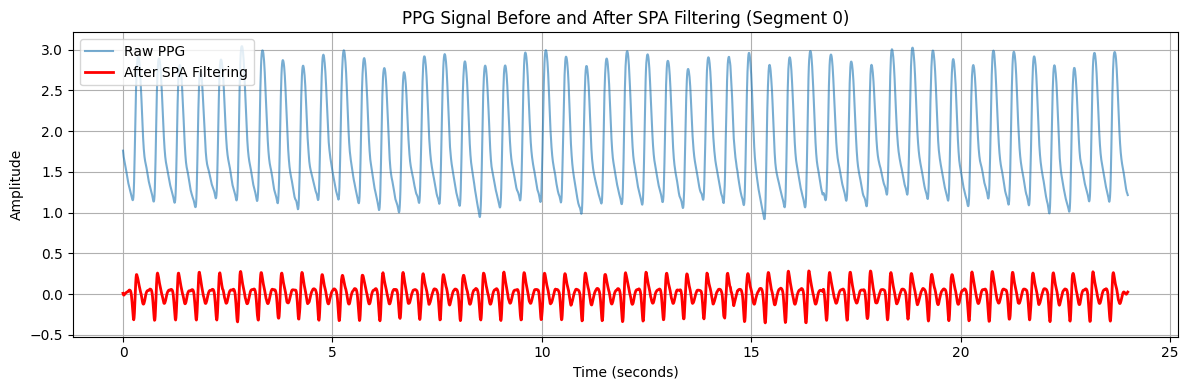

In [17]:
import matplotlib.pyplot as plt

# Choose any segment (e.g., segment 0)
i = 0
raw_ppg = ppg_segments[i]
spa_ppg = spa_filter(raw_ppg)

# Time axis
fs = 125
t = np.arange(len(raw_ppg)) / fs

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t, raw_ppg, label='Raw PPG', alpha=0.6)
plt.plot(t, spa_ppg, label='After SPA Filtering', color='red', linewidth=2)
plt.title(f"PPG Signal Before and After SPA Filtering (Segment {i})")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
